In [225]:
## This notebook finds the common outlier galaxies between the wfirst and lsst. 

In [226]:
import pandas as pd;import numpy as np; import matplotlib.pyplot as plt; 
import pickle
from matplotlib.colors import LogNorm,Normalize
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)

In [227]:
# Blue = Outliers. Reading the LSST and LW Outlier file
blue_w=pd.read_csv('../Data/blue_WFIRST_id.csv',sep=' ') # WFIRST
blue_l=pd.read_csv('../Data/blue_LSST_id.csv',sep=' ') # LSST

In [228]:
# Green = 
Core points
green_w=pd.read_csv('../Data/green_WFIRST_id.csv',sep=' ')
green_l=pd.read_csv('../Data/green_LSST_id.csv',sep=' ')

In [229]:
plt.rcParams.update({'font.size': 15})

In [412]:
# WFIRST outliers have 4427 candidates
blue_w

,id,zphoto,zspec
0,310087,0.0875,0.0222
1,226179,0.2089,0.0223
2,422834,0.2228,0.0226
3,44398,0.0970,0.0283
4,52174,0.1278,0.0456
...,...,...,...
4422,975900,1.0240,1.1904
4423,886216,1.0054,1.1907
4424,318559,1.0496,1.1918
4425,634712,1.0671,1.1953


In [413]:
# LSST outliers have 9179 candidates
blue_l

,z_phot,z_true,id
0,0.2387,0.0226,422834
1,0.1202,0.0296,293190
2,0.1743,0.0456,52174
3,0.1887,0.0458,446338
4,0.2051,0.0458,58129
...,...,...,...
9174,1.0716,1.1995,391573
9175,1.3876,1.1997,83157
9176,0.9907,1.1998,828715
9177,1.0501,1.1999,832297


In [414]:
# Choosing the intersection outlier candiates
s1 = pd.merge(blue_w, blue_l, how='inner', on=['id'])

In [417]:
# Intersection has 1271 cndidates. 
print('The intersection outliers are :')
s1

The intersection outliers are :


,id,zphoto,zspec,z_phot,z_true
0,422834,0.2228,0.0226,0.2387,0.0226
1,52174,0.1278,0.0456,0.1743,0.0456
2,10702,0.2091,0.0759,0.2132,0.0759
3,927460,0.1709,0.0766,0.2066,0.0766
4,4298,0.2593,0.0777,0.2134,0.0777
...,...,...,...,...,...
1266,760136,0.9941,1.1424,0.9862,1.1424
1267,399484,0.9647,1.1757,1.6071,1.1757
1268,89436,1.0391,1.1772,1.0443,1.1772
1269,975900,1.0240,1.1904,1.0361,1.1904


In [233]:
# For the core
s2 = pd.merge(green_w, green_l, how='inner', on=['id'])

In [236]:
# From S1, we are making two seperate files of L and LW for the intersection galxies. 
outlier_wfirst_intersection=s1.iloc[:,0:3] #LW
outlier_lsst_intersection=s1.iloc[:,3:] #L
outlier_lsst_intersection['id']=s1.iloc[:,0]#L

In [237]:
outlier_wfirst_intersection # LW

,id,zphoto,zspec
0,422834,0.2228,0.0226
1,52174,0.1278,0.0456
2,10702,0.2091,0.0759
3,927460,0.1709,0.0766
4,4298,0.2593,0.0777
...,...,...,...
1266,760136,0.9941,1.1424
1267,399484,0.9647,1.1757
1268,89436,1.0391,1.1772
1269,975900,1.0240,1.1904


In [238]:
#outlier_wfirst_intersection.columns = ['zphoto','zspec','id']

In [239]:
outlier_lsst_intersection.columns = ['zphoto','zspec','id']

In [240]:
#outlier_lsst_intersection.to_csv('outlier_lsst_intersection.csv',index=False)

In [241]:
#outlier_wfirst_intersection.to_csv('outlier_wfirst_intersection.csv',index=False)

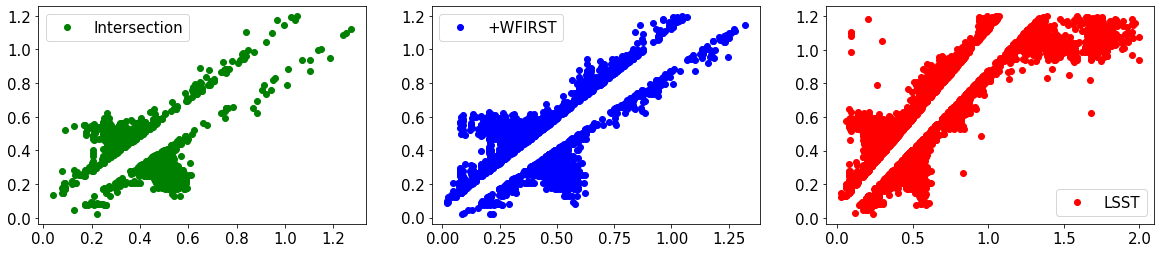

In [242]:
plt.rcParams['figure.figsize'] = [20,4] 
plt.subplot(1,3,1)
plt.plot(s1.zphoto,s1.zspec,'o',label='Intersection',c='g')
plt.legend()
plt.subplot(1,3,2)
plt.plot(blue_w.zphoto,blue_w.zspec,'o',label='+WFIRST',c='b')
plt.legend()
plt.subplot(1,3,3)
plt.plot(blue_l.z_phot,blue_l.z_true,'o',label='LSST',c='r')
plt.legend()

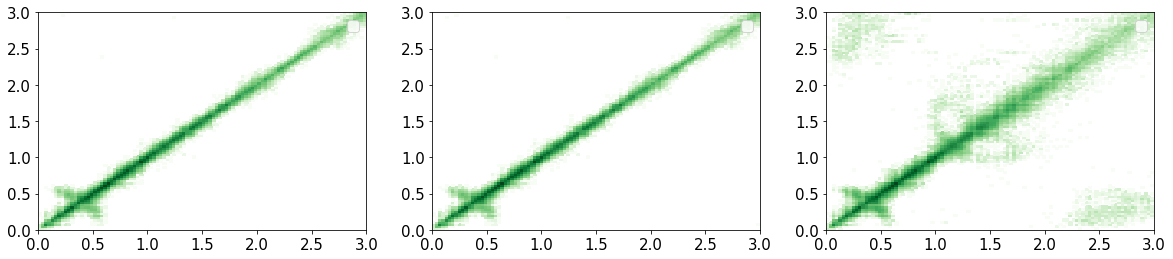

In [243]:
plt.rcParams['figure.figsize'] = [20,4] 
plt.subplot(1,3,1)

a=plt.hist2d( s2.z_phot_x,s2.z_true_x, bins=100, range=[[0.0,3.0],[0.0,3.0]], norm=LogNorm(clip=True), \
            cmin=1, cmap='Greens',label='Intersection');
plt.legend('Intersection')
plt.subplot(1,3,2)

b=plt.hist2d( green_w.z_phot, green_w.z_true, bins=100, range=[[0.0,3.0],[0.0,3.0]], norm=LogNorm(clip=True), \
            cmin=1, cmap='Greens',label='+WFIRST');
plt.legend('+WFIRST')
plt.subplot(1,3,3)

c=plt.hist2d( green_l.z_phot, green_l.z_true, bins=100, range=[[0.0,3.0],[0.0,3.0]], norm=LogNorm(clip=True), \
            cmin=1, cmap='Greens',label='LSST');
plt.legend('LSST',fontsize=15)


In [253]:
# https://stackoverflow.com/questions/44265572/find-common-elements-in-2d-numpy-arrays
blue_l_np = np.array(blue_l)
blue_w_np = np.array(blue_w)
intersect = np.intersect1d(blue_w_np[:, 0], blue_l_np[:, 2])

blue_w_matches = blue_w_np[np.any(blue_w_np[:, 0] == intersect[:, None], axis=0)]
blue_l_matches = blue_l_np[np.any(blue_l_np[:, 2] == intersect[:, None], axis=0)]

In [254]:
intersect

array([  1147.,   1512.,   1766., ..., 997797., 999190., 999197.])

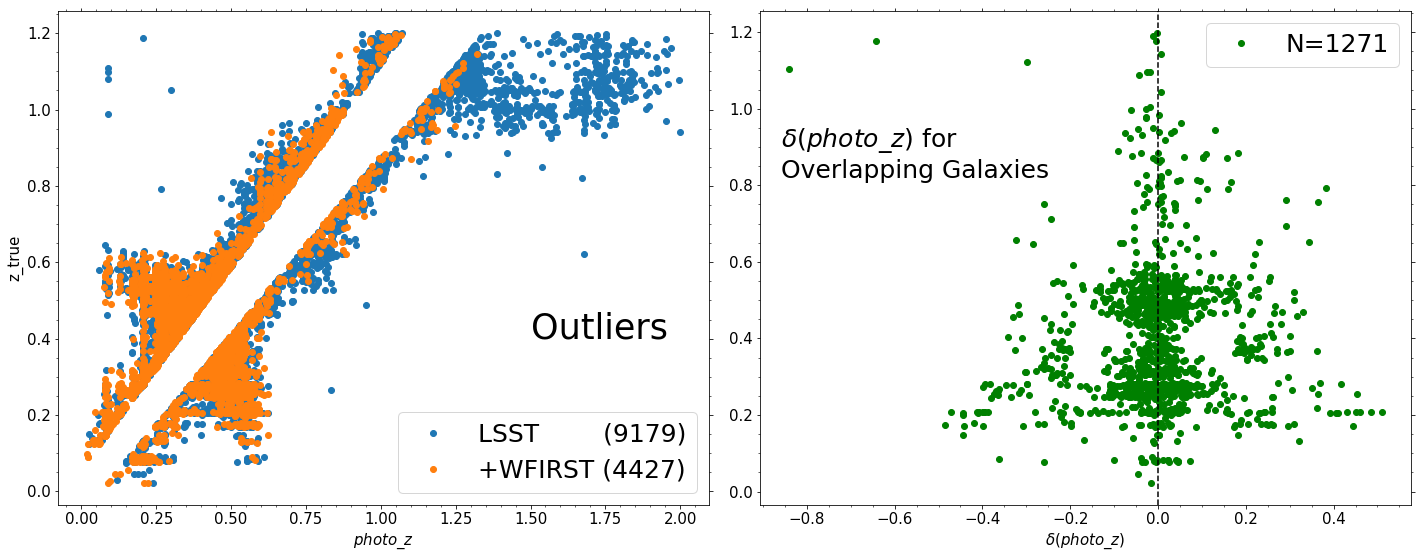

In [334]:
plt.rcParams['figure.figsize'] = [20,8] 
#a.subplot(1,2,1)
fig, (a1,a2) = plt.subplots(1,2)
l1 = len(blue_l_np[:,1])
l2 = len(blue_w_np[:,1])
a1.plot(blue_l_np[:,0],blue_l_np[:,1],'o',label='LSST        (%s)'%l1)
a1.plot(blue_w_np[:,1],blue_w_np[:,2],'o',label='+WFIRST (%s)'%l2)
a1.set_ylabel('z_true')
a1.set_xlabel('$photo\_z$')
a1.yaxis.set_ticks_position('both')
a1.xaxis.set_ticks_position('both')
a1.minorticks_on()
a1.legend(fontsize=25)
a1.text(1.5,0.4,'Outliers',fontsize=35) 


l = len(blue_l_matches[:,1])
#a2.plot(pd.DataFrame(blue_w_matches-blue_l_matches).iloc[:,1],blue_l_matches[:,1],'o',c='g',label='N=%s'%l)
a2.plot(s1.zphoto-s1.z_phot,s1.zspec,'o',c='g',label='N=%s'%l)
a2.axvline(0,linestyle='--',c='black')
a2.set_xlabel('$\delta (photo\_z)$')
a2.yaxis.set_ticks_position('both')
a2.xaxis.set_ticks_position('both')
a2.minorticks_on()
a2.legend(fontsize=25)
plt.text(-0.86,0.9,'$\delta(photo\_z)$ for ',fontsize=25) #
plt.text(-0.86,0.82,'Overlapping Galaxies',fontsize=25)
plt.tight_layout()
#plt.savefig('Wfirst_lsst_photoz_compare.pdf',bbox_inches='tight')

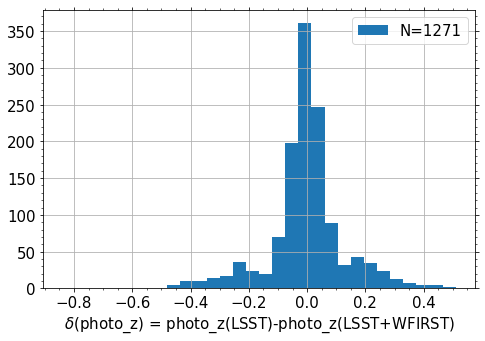

In [304]:
plt.rcParams['figure.figsize'] = [7,5] 
fig, ax = plt.subplots()
plt.hist(pd.DataFrame(s1.zphoto-s1.z_phot).iloc[:,0],bins=30,label='N=%s'%(len(s1.zphoto-s1.z_phot)))
plt.legend()
ax.minorticks_on()
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.grid()
plt.xlabel('$\delta$(photo_z) = photo_z(LSST)-photo_z(LSST+WFIRST)')
plt.tight_layout()
#plt.savefig('Wfirst_lsst_photoz_compare-2.pdf',bbox_inches='tight')

# -------------------------- Intersection Part Concluded ------------------------
# Non Intersection

In [288]:
blue_wfirst_exclusive = blue_w[~blue_w.id.isin(s1.id)]

In [289]:
blue_lsst_exclusive = blue_l[~blue_l.id.isin(s1.id)]

In [291]:
blue_lsst_exclusive.to_csv('blue_lsst_exclusive.csv',index=False)
blue_wfirst_exclusive.to_csv('blue_wfirst_exclusive.csv',index=False)

In [292]:
# This files will go to tzpz_plotting 2 notebooks

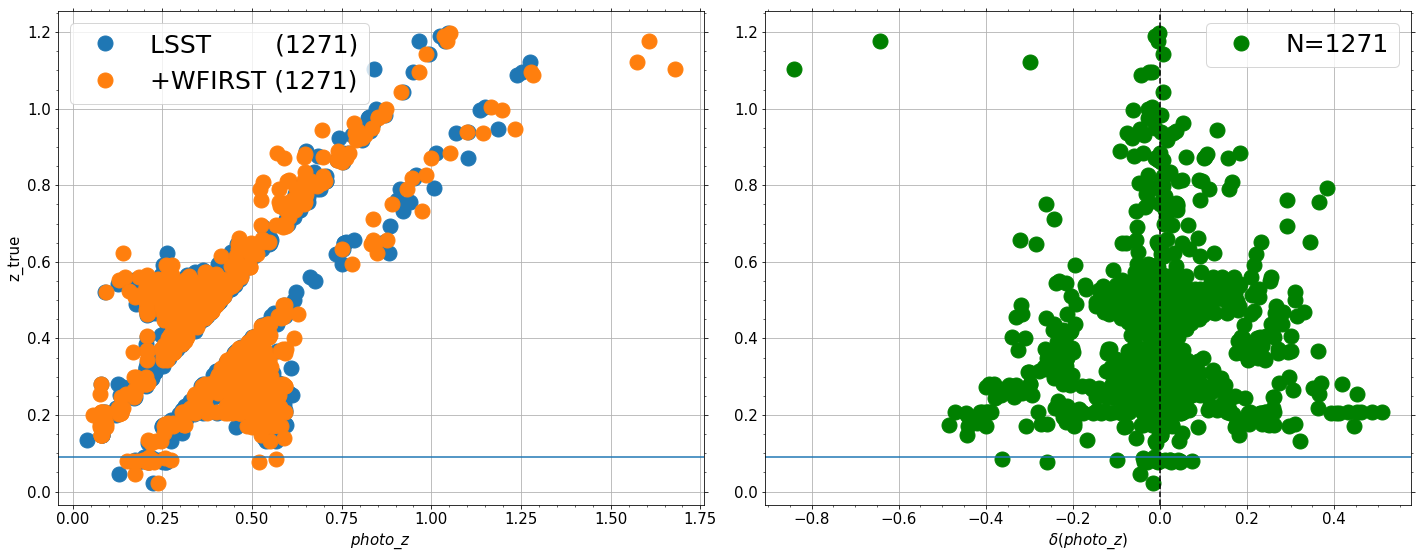

In [342]:
plt.rcParams['figure.figsize'] = [20,8] 
#a.subplot(1,2,1)
fig, (a1,a2) = plt.subplots(1,2)
l1 = len(s1['zphoto'])
l2 = len(s1['z_phot'])
a1.plot(s1['zphoto'],s1['zspec'],'o',markersize=15,label='LSST        (%s)'%l1)
a1.plot(s1['z_phot'],s1['z_true'],'o',markersize=15,label='+WFIRST (%s)'%l2)
a1.set_ylabel('z_true')
a1.set_xlabel('$photo\_z$')
a1.yaxis.set_ticks_position('both')
a1.xaxis.set_ticks_position('both')
a1.minorticks_on()
a1.legend(fontsize=25)
a1.axhline(0.09)
a1.grid()
#a1.set_ylim(0.07,0.092)
#a1.text(1.5,0.4,'Outliers',fontsize=35) 


l = len(blue_l_matches[:,1])
#a2.plot(pd.DataFrame(blue_w_matches-blue_l_matches).iloc[:,1],blue_l_matches[:,1],'o',c='g',label='N=%s'%l)
a2.plot(s1.zphoto-s1.z_phot,s1.zspec,'o',markersize=15,c='g',label='N=%s'%l)
a2.axvline(0,linestyle='--',c='black')
a2.set_xlabel('$\delta (photo\_z)$')
a2.yaxis.set_ticks_position('both')
a2.xaxis.set_ticks_position('both')
a2.minorticks_on()
a2.legend(fontsize=25)
a2.axhline(0.09)
#a2.set_ylim(0.07,0.092)
#plt.text(-0.86,0.9,'$\delta(photo\_z)$ for ',fontsize=25) #
#plt.text(-0.86,0.82,'Overlapping Galaxies',fontsize=25)
plt.tight_layout()
a2.grid()
#plt.savefig('Wfirst_lsst_photoz_compare.pdf',bbox_inches='tight')

# More Comparisons

In [409]:
s1_subset_z01 = s1[abs(s1.zphoto-s1.z_phot)>0.4]#s1[s1.zspec<=0.2]
s1_subset_z01.reset_index(inplace = True)
s1_subset_z01=s1_subset_z01.drop(['index'],axis=1)
s1_subset_z01['delta_photoz']=(s1_subset_z01.zphoto-s1_subset_z01.z_phot)
(s1_subset_z01).to_csv('photoz_shift_LSST_to_WFIRST.csv',index=False,sep=' ')

In [411]:
max(s1_subset_z01['delta_photoz'])

0.5095999999999999

In [ ]:
a1.plot(s1_subset_z01['zphoto'],s1_subset_z01['zspec'], ls="", marker="o")
for xi, yi, pidi in zip(s1_subset_z01['zphoto'],s1_subset_z01['zspec'],s1_subset_z01['id']):
    a1.annotate(str(pidi), xy=(xi,yi))
a1.plot(s1_subset_z01['z_phot'],s1_subset_z01['z_true'], ls="", marker="o")    
for xi, yi, pidi in zip(s1_subset_z01['z_phot'],s1_subset_z01['z_true'],s1_subset_z01['id']):
    a1.annotate(str(pidi), xy=(xi,yi))

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


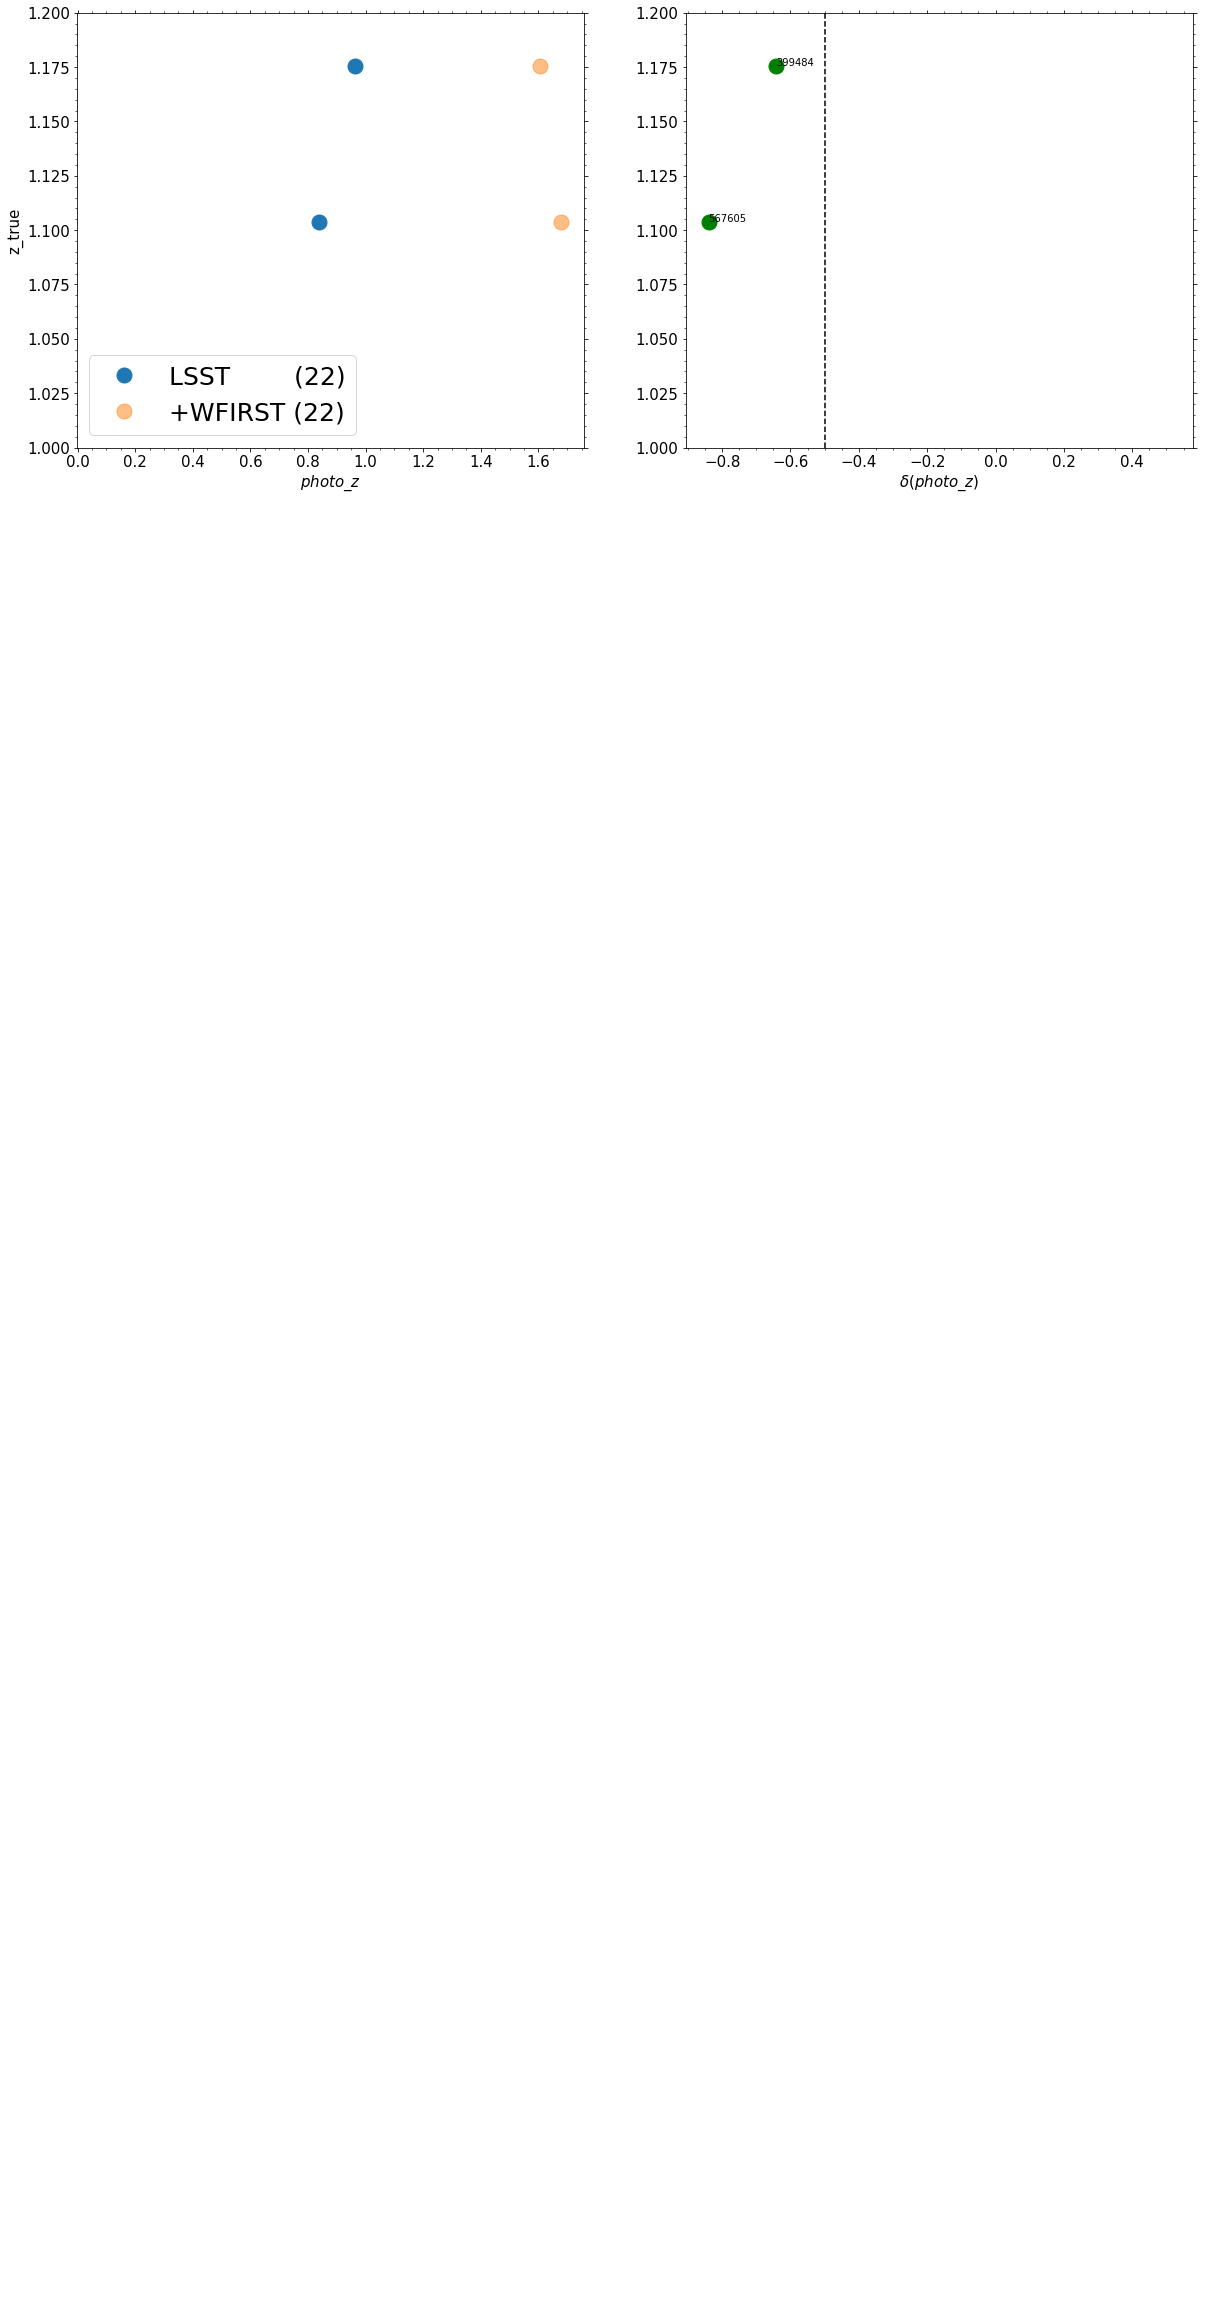

In [387]:
plt.rcParams['figure.figsize'] = [20,8] 
#a.subplot(1,2,1)
fig, (a1,a2) = plt.subplots(1,2)
l1 = len(s1_subset_z01['zphoto'])
l2 = len(s1_subset_z01['z_phot'])

a1.plot(s1_subset_z01['zphoto'],s1_subset_z01['zspec'],'o',markersize=15,label='LSST        (%s)'%l1)
a1.plot(s1_subset_z01['z_phot'],s1_subset_z01['z_true'],'o',markersize=15,label='+WFIRST (%s)'%l2,alpha=0.5)
a1.set_ylabel('z_true')
a1.set_xlabel('$photo\_z$')
a1.yaxis.set_ticks_position('both')
a1.xaxis.set_ticks_position('both')
a1.minorticks_on()
a1.legend(fontsize=25)
#a1.set_ylim(0.146,0.3)
a1.set_ylim(1.,1.2)
#a1.text(1.5,0.4,'Outliers',fontsize=35) 


l = len(blue_l_matches[:,1])
#a2.plot(pd.DataFrame(blue_w_matches-blue_l_matches).iloc[:,1],blue_l_matches[:,1],'o',c='g',label='N=%s'%l)
a2.plot(s1_subset_z01.zphoto-s1_subset_z01.z_phot,s1_subset_z01.zspec,'o',markersize=15,c='g',label='N=%s'%l)
#a1.plot(s1_subset_z01['z_phot'],s1_subset_z01['z_true'], ls="", marker="o") 
for xi, yi, pidi in zip(s1_subset_z01.zphoto-s1_subset_z01.z_phot,s1_subset_z01['zspec'],s1_subset_z01['id']):
    a2.annotate(str(pidi), xy=(xi,yi),fontsize=10)
#a2.axvline(0,linestyle='--',c='black')
#a2.axvline(0.5,linestyle='--',c='black');
a2.axvline(-0.5,linestyle='--',c='black')
a2.set_xlabel('$\delta (photo\_z)$')
a2.yaxis.set_ticks_position('both')
a2.xaxis.set_ticks_position('both')
a2.minorticks_on()
#a2.legend(fontsize=25)
#a2.set_ylim(0.146,0.3)
a2.set_ylim(1.,1.2)
#plt.text(-0.86,0.9,'$\delta(photo\_z)$ for ',fontsize=25) #
#plt.text(-0.86,0.82,'Overlapping Galaxies',fontsize=25)
plt.tight_layout()
#plt.savefig('Wfirst_lsst_photoz_compare_zoom1.pdf',bbox_inches='tight')plt.savefig('Wfirst_lsst_photoz_compare_zoom1.pdf',bbox_inches='tight')
#plt.savefig('Wfirst_lsst_photoz_compare_zoom3.jpg',bbox_inches='tight')

In [358]:
s1_subset_z01[s1_subset_z01.id==127194]

,id,zphoto,zspec,z_phot,z_true
30,127194,0.0823,0.1477,0.5262,0.1477


In [404]:
s1_subset_z01['delta_photoz']=(s1_subset_z01.zphoto-s1_subset_z01.z_phot)

In [405]:
s1_subset_z01

,id,zphoto,zspec,z_phot,z_true,delta_photoz
0,127194,0.0823,0.1477,0.5262,0.1477,-0.4439
1,607925,0.5248,0.1710,0.0804,0.1710,0.4444
2,488165,0.0854,0.1713,0.5270,0.1713,-0.4416
3,790118,0.0779,0.1742,0.5630,0.1742,-0.4851
4,703461,0.0798,0.1792,0.4989,0.1792,-0.4191
5,495569,0.1197,0.1987,0.5635,0.1987,-0.4438
6,649447,0.1270,0.2044,0.5367,0.2044,-0.4097
7,296327,0.5448,0.2057,0.1341,0.2057,0.4107
8,413851,0.5337,0.2060,0.1289,0.2060,0.4048
9,242055,0.1317,0.2063,0.5767,0.2063,-0.4450


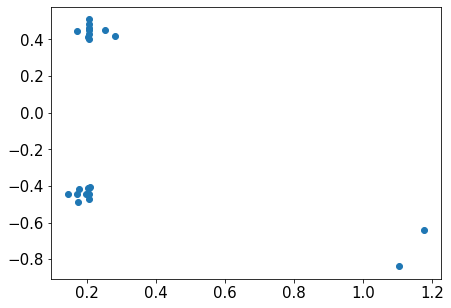

In [408]:
plt.rcParams['figure.figsize'] = [7,5] 
plt.plot(s1_subset_z01.z_true,s1_subset_z01.delta_photoz,'o')

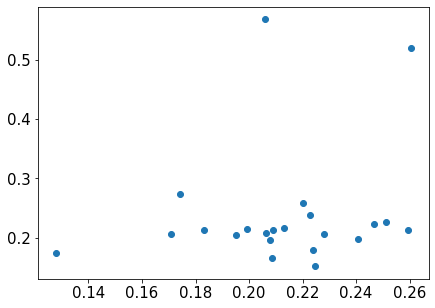

In [308]:
plt.plot(s1_subset_z01.zphoto,s1_subset_z01.z_phot,'o')

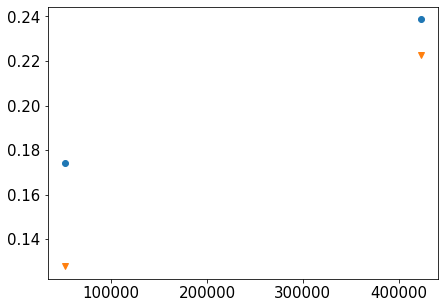

In [310]:
plt.plot(s1_subset_z01.id[:2],s1_subset_z01.z_phot[:2],'o')
plt.plot(s1_subset_z01.id[:2],s1_subset_z01.zphoto[:2],'v')

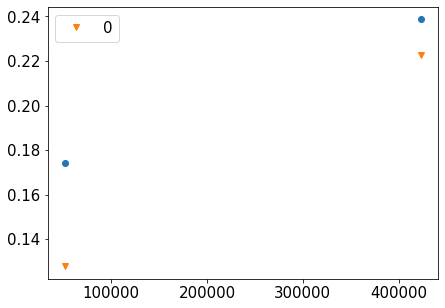

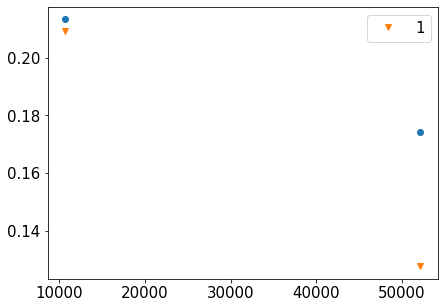

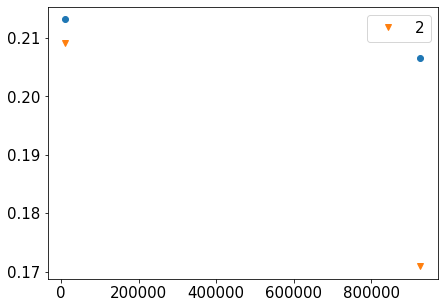

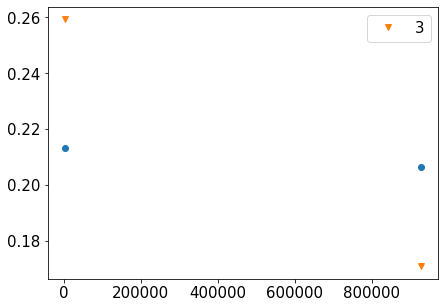

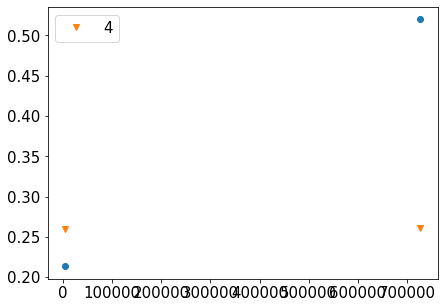

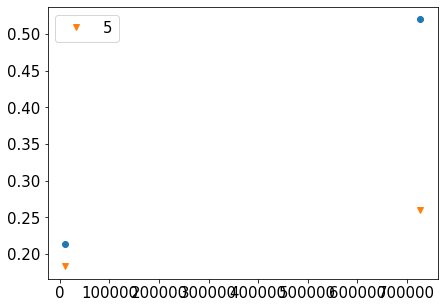

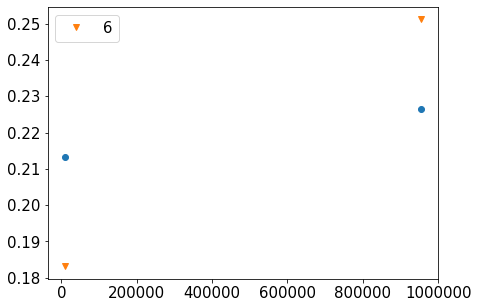

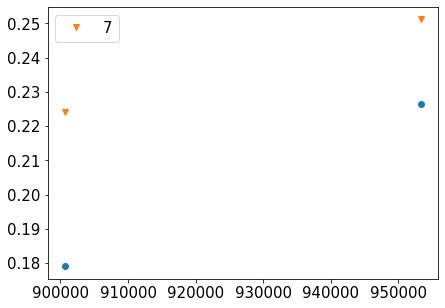

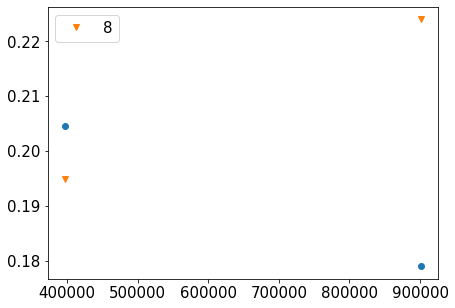

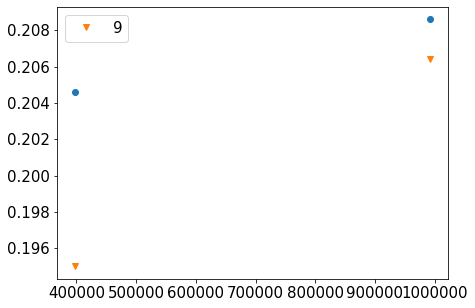

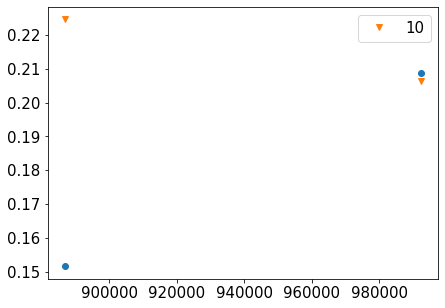

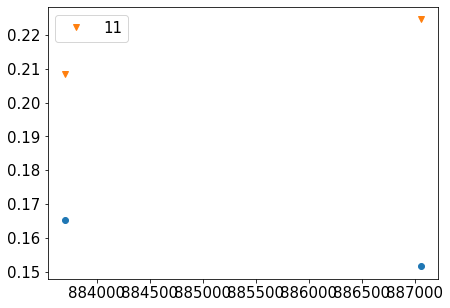

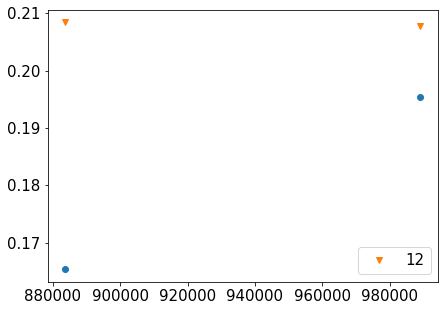

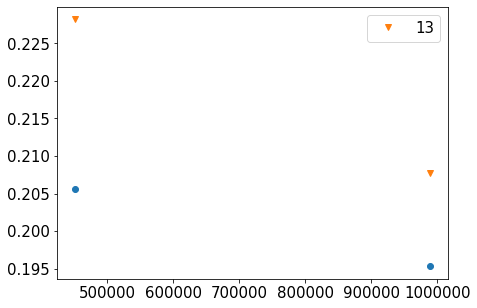

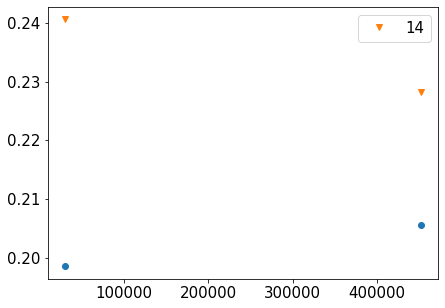

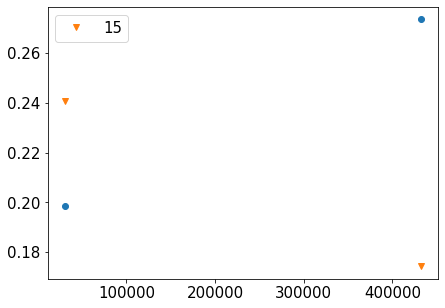

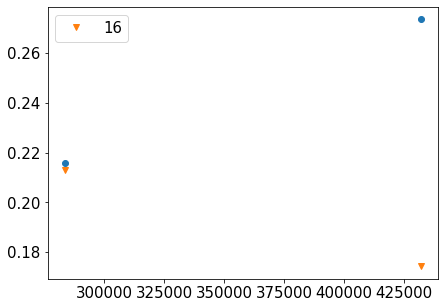

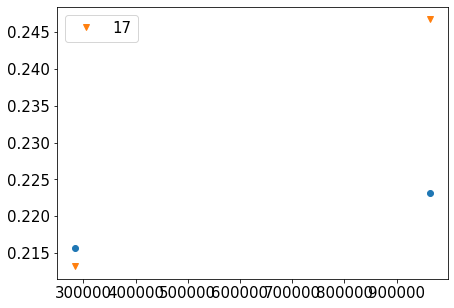

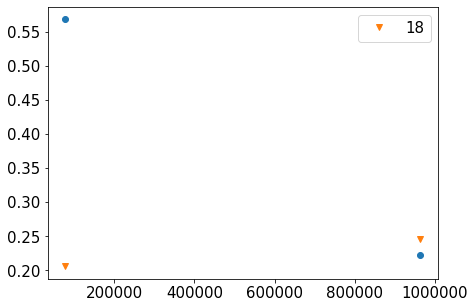

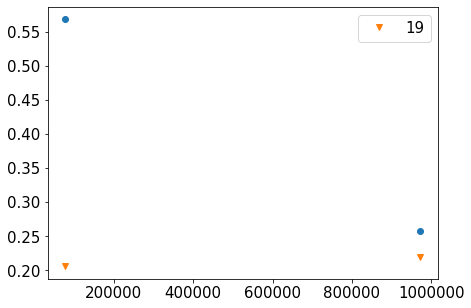

In [321]:
for i in range(20):
    #print(i,i+2)
    plt.plot(s1_subset_z01.id[i:i+2],s1_subset_z01.z_phot[i:i+2],'o')
    plt.plot(s1_subset_z01.id[i:i+2],s1_subset_z01.zphoto[i:i+2],'v',label='%s'%(i))
    plt.legend()
    plt.show()